In [1]:
%pylab inline
font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/pymodules/python2.7/matplotlib/__init__.py:758: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now '/home/ngaravito/.config'/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [21]:
def rvir(Mvir):
    h = 0.7
    Omega_m = 0.27
    Dvir = 360.0
    R_vir = 206 / h * (Dvir * Omega_m/97.2)**(-1.0/3.0) * ( Mvir/ (1E12 / h ))**(1.0/3.0)
    return R_vir

In [25]:
Rv = rvir(1E11)

In [26]:
c = Rv / 13
print c

9.32950298638


In [30]:
def fx(x):
    f = log(1.+x) - ( x / (1. + x) )
    return f

def c(cvir, c200):
    q = 2.058
    y = (c200 / cvir) - (fx(c200) / (q * fx(cvir)))**(1./3.)
    return y

2.73249426548


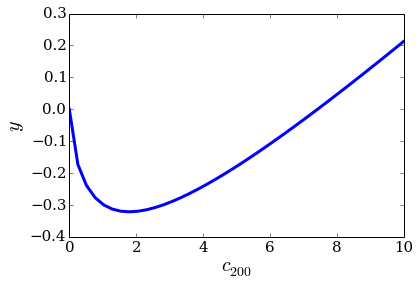

In [31]:
c_test = linspace(0, 10, 40)
plot(c_test, c(10, c_test) ,lw=3)
xlabel('$c_{200}$', fontsize=20)
ylabel('$ y $', fontsize=20)
savefig("c200cvir.png", bbox_inches='tight')
print c(1, 4)

In [32]:
def bissection(cvir):
    min_c200 = 0.1
    max_c200 = cvir
    c_init = 0.5*(min_c200 + max_c200)
    y = c(cvir, c_init)
    while abs(y) > 0.000002:
        #print c_init
        if y>0:
            max_c200 = c_init
        if (y<0) :
            min_c200 = c_init
        c_init = 0.5*(min_c200 + max_c200)
        y = c(cvir, c_init)
    return c_init

In [34]:
c200 = bissection(9.32)
print c200

6.89612030029


In [6]:
def m200mvir(c200, cvir):
    x = fx(c200)/fx(cvir)
    return x

def ars(c):
    x = 1 / ( (2.0*fx(c))**(-0.5) - (1.0/c) )
    return x

def mhmvir(ar, cvir):
    x = ar**2 / (2.0*fx(cvir))
    return x

In [36]:
print "c200 = ", c200
M200Mvir =  m200mvir(c200, 9.32)

print "M200/Mvir = ", M200Mvir
ar_s = ars(10)

print "avir/r_s = ", ar_s
MhMvir =  mhmvir(ar_s, 10)


print "MH/Mvir = ", MhMvir

a = 30
rs = a / ar_s
Mvir = 1E12
Mh = Mvir *  MhMvir
print a, rs
print Mh, Mvir

c200 =  6.89612030029
M200/Mvir =  0.833703841328
avir/r_s =  2.08543176875
MH/Mvir =  1.46057661037
30 14.3855102093
1.46057661037e+12 1e+12


In [8]:
def rho_NFW(rs, r, M):
    #a = rvir / c
    print a
    rho = M / ( 2*np.pi*a**3 *(r/rs)*(1 + r/rs)**2 )
    return rho

In [9]:
def Density_Hernquist(a, r, M):
    rho = M / (2 * np.pi) * a / (r*(r+a)**3)
    return rho

30


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


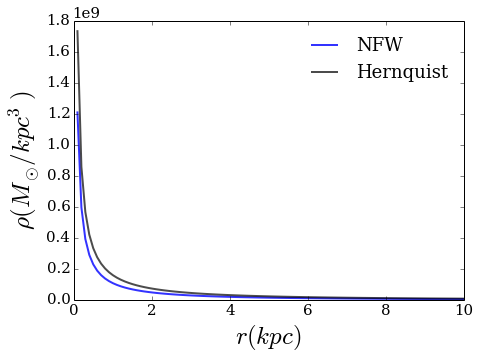

In [10]:
plt.figure(figsize=(7, 5))
rr = linspace(0, 10, 100)
plot(rr, rho_NFW(rs, rr, Mvir), lw=2, label='NFW', alpha=0.8)
plot(rr, Density_Hernquist(a, rr, Mh), lw=2, label='Hernquist', c='k', alpha=0.7)
legend(frameon = False)
xlabel("$r(kpc)$", fontsize=25)
ylabel(r"$\rho(M_{\odot}/kpc^3)$", fontsize=25)
savefig('../figures/hernquistNFW.png', bbox_inches='tight')